In [1]:
# Importing the required libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [2]:
# Reading the csv file and putting it into 'df' object
df = pd.read_csv('heart_v2.csv')
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [3]:
df.shape

(270, 5)

In [4]:
# Putting feature variable to X
X = df.drop('heart disease',axis=1)
# Putting response variable to y
y = df['heart disease']

In [5]:
# now lets split the data into train and test
from sklearn.model_selection import train_test_split

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((189, 4), (81, 4))

In [6]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5, n_estimators=100, oob_score=True)
# n_jobs=-1: This tells the classifier to use all available processors for parallel computation
# n_estimators=100: This specifies the number of trees in the forest

In [7]:
%%time
classifier_rf.fit(X_train, y_train)

Wall time: 261 ms


RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [8]:
# checking the oob score
classifier_rf.oob_score_

0.656084656084656

In [9]:
# checking the model score
classifier_rf.score(X_test, y_test)

0.654320987654321

**Grid Search for Parameter Finetuning**

In [7]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
rf

RandomForestClassifier(n_jobs=-1, random_state=42)

In [8]:
# Creating a dictionary of parameteres with their values being in lists
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [9]:
# Imporint GridSearch
from sklearn.model_selection import GridSearchCV

In [10]:
# Instantiate the grid search model

grid_search = GridSearchCV(estimator=rf, param_grid=params, cv = 4, n_jobs=-1, verbose=1)
grid_search

GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             verbose=1)

In [11]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits
CPU times: total: 2.73 s
Wall time: 31.6 s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             verbose=1)

In [12]:
grid_search.best_score_

0.6985815602836879

In [13]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=5, min_samples_leaf=10, n_estimators=10,
                       n_jobs=-1, random_state=42)

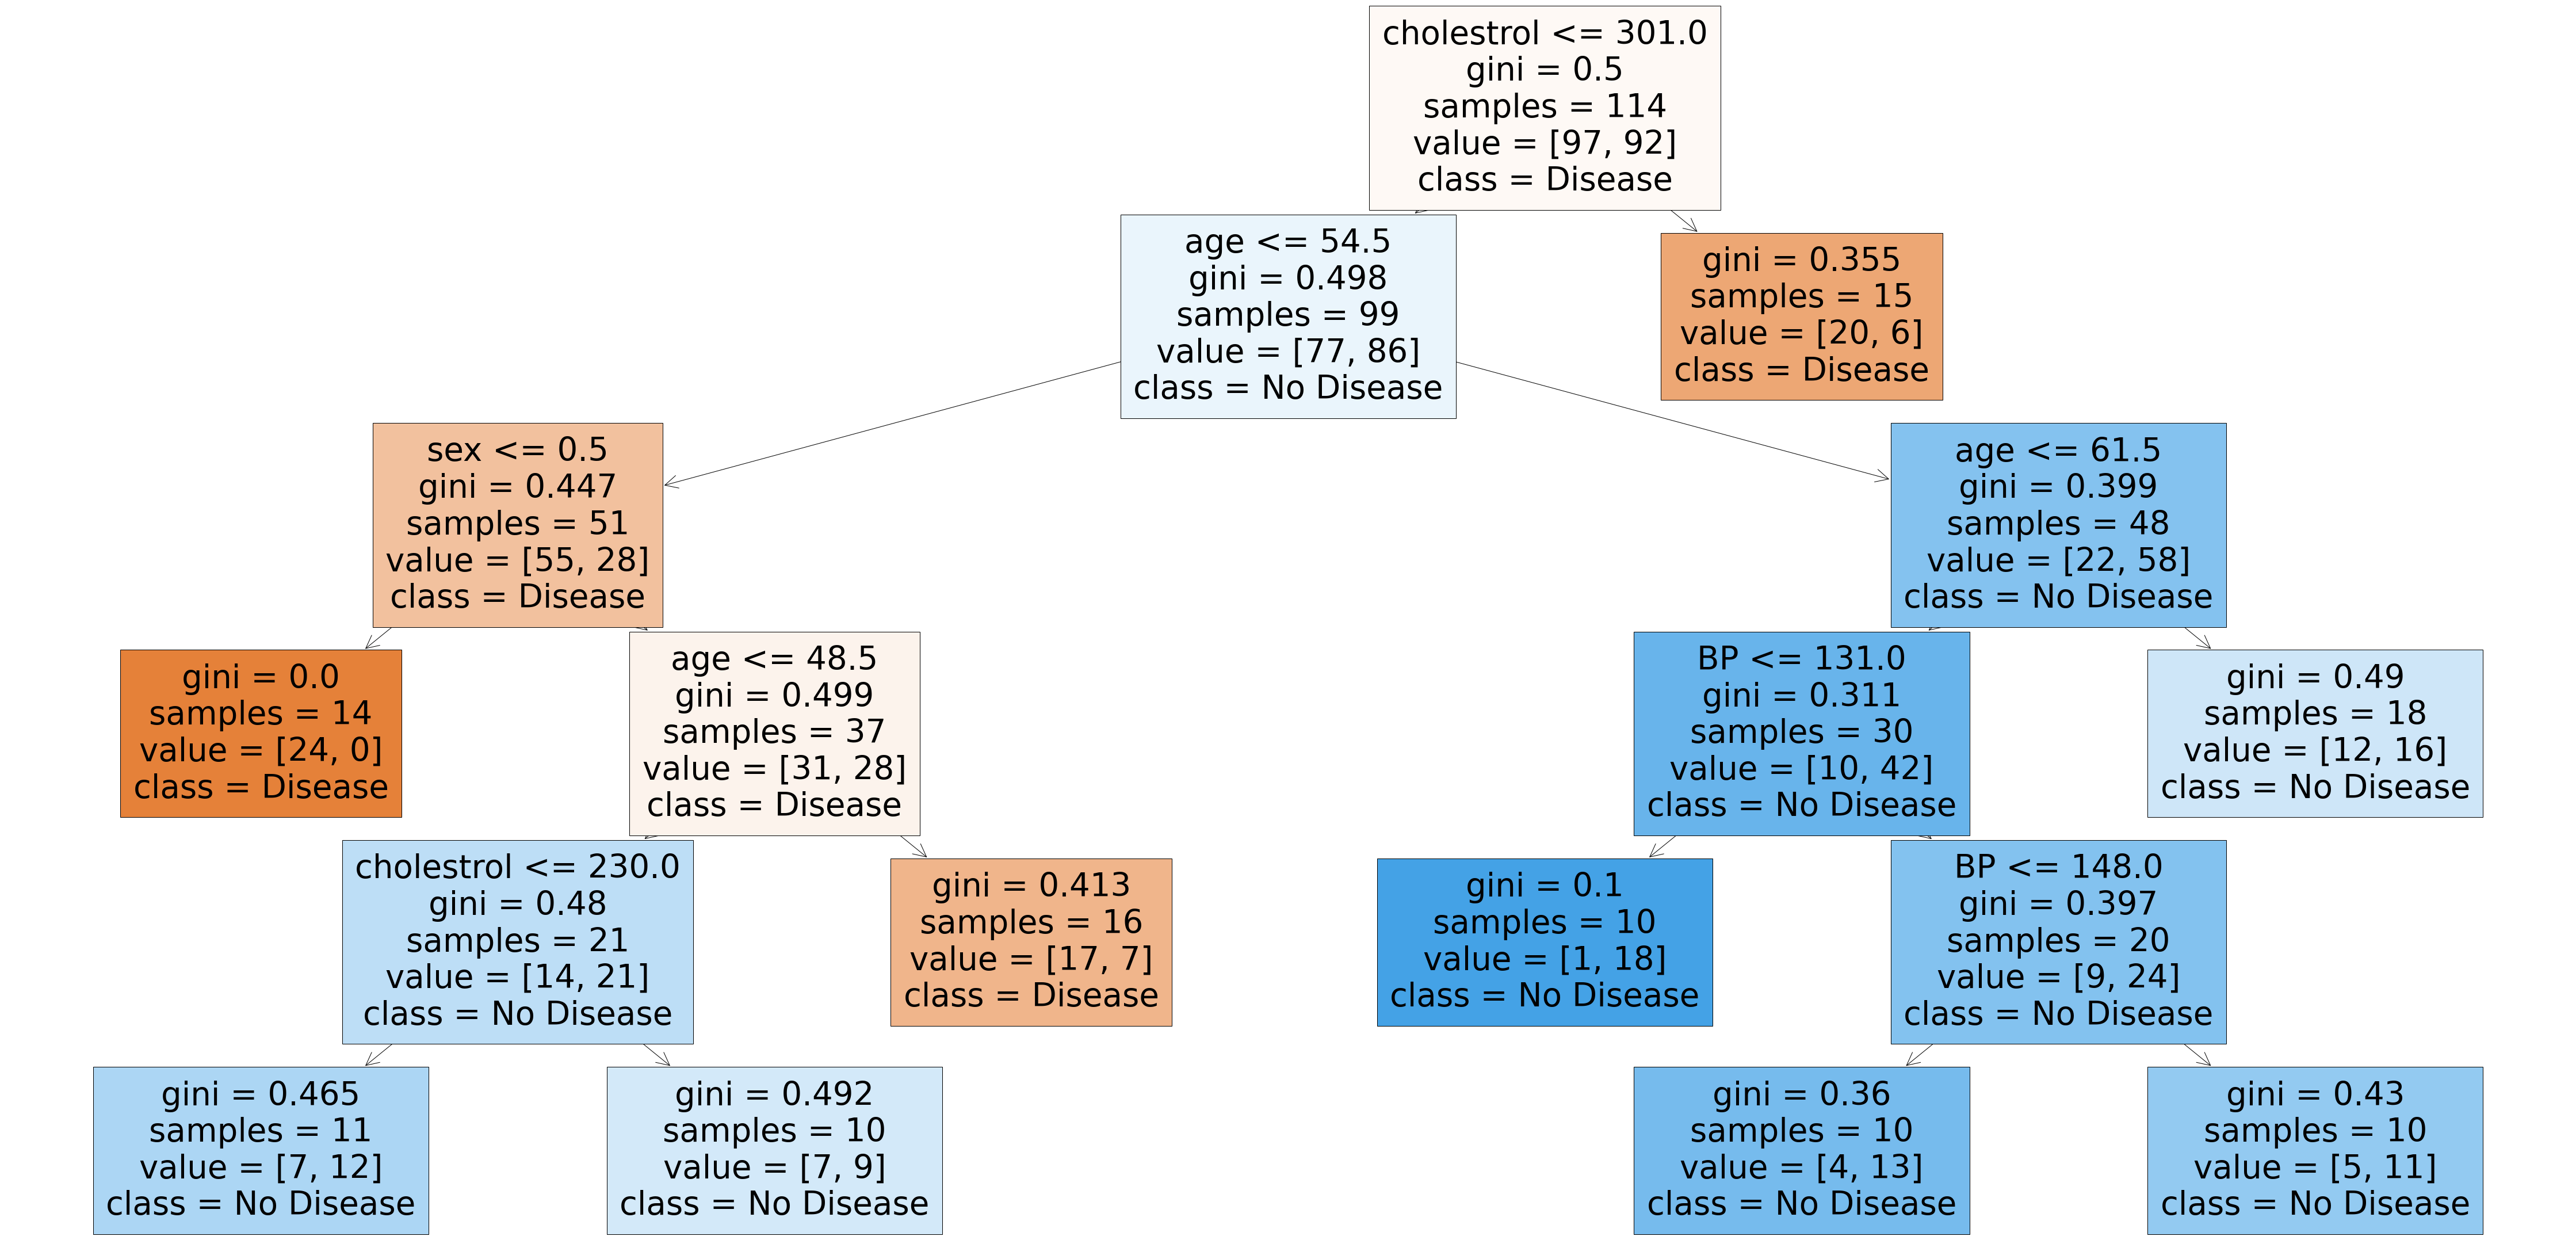

In [28]:
# Visualizing the decision tree with index 5 in the given random foresr

from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[5], feature_names = X.columns,class_names=['Disease', "No Disease"],filled=True);

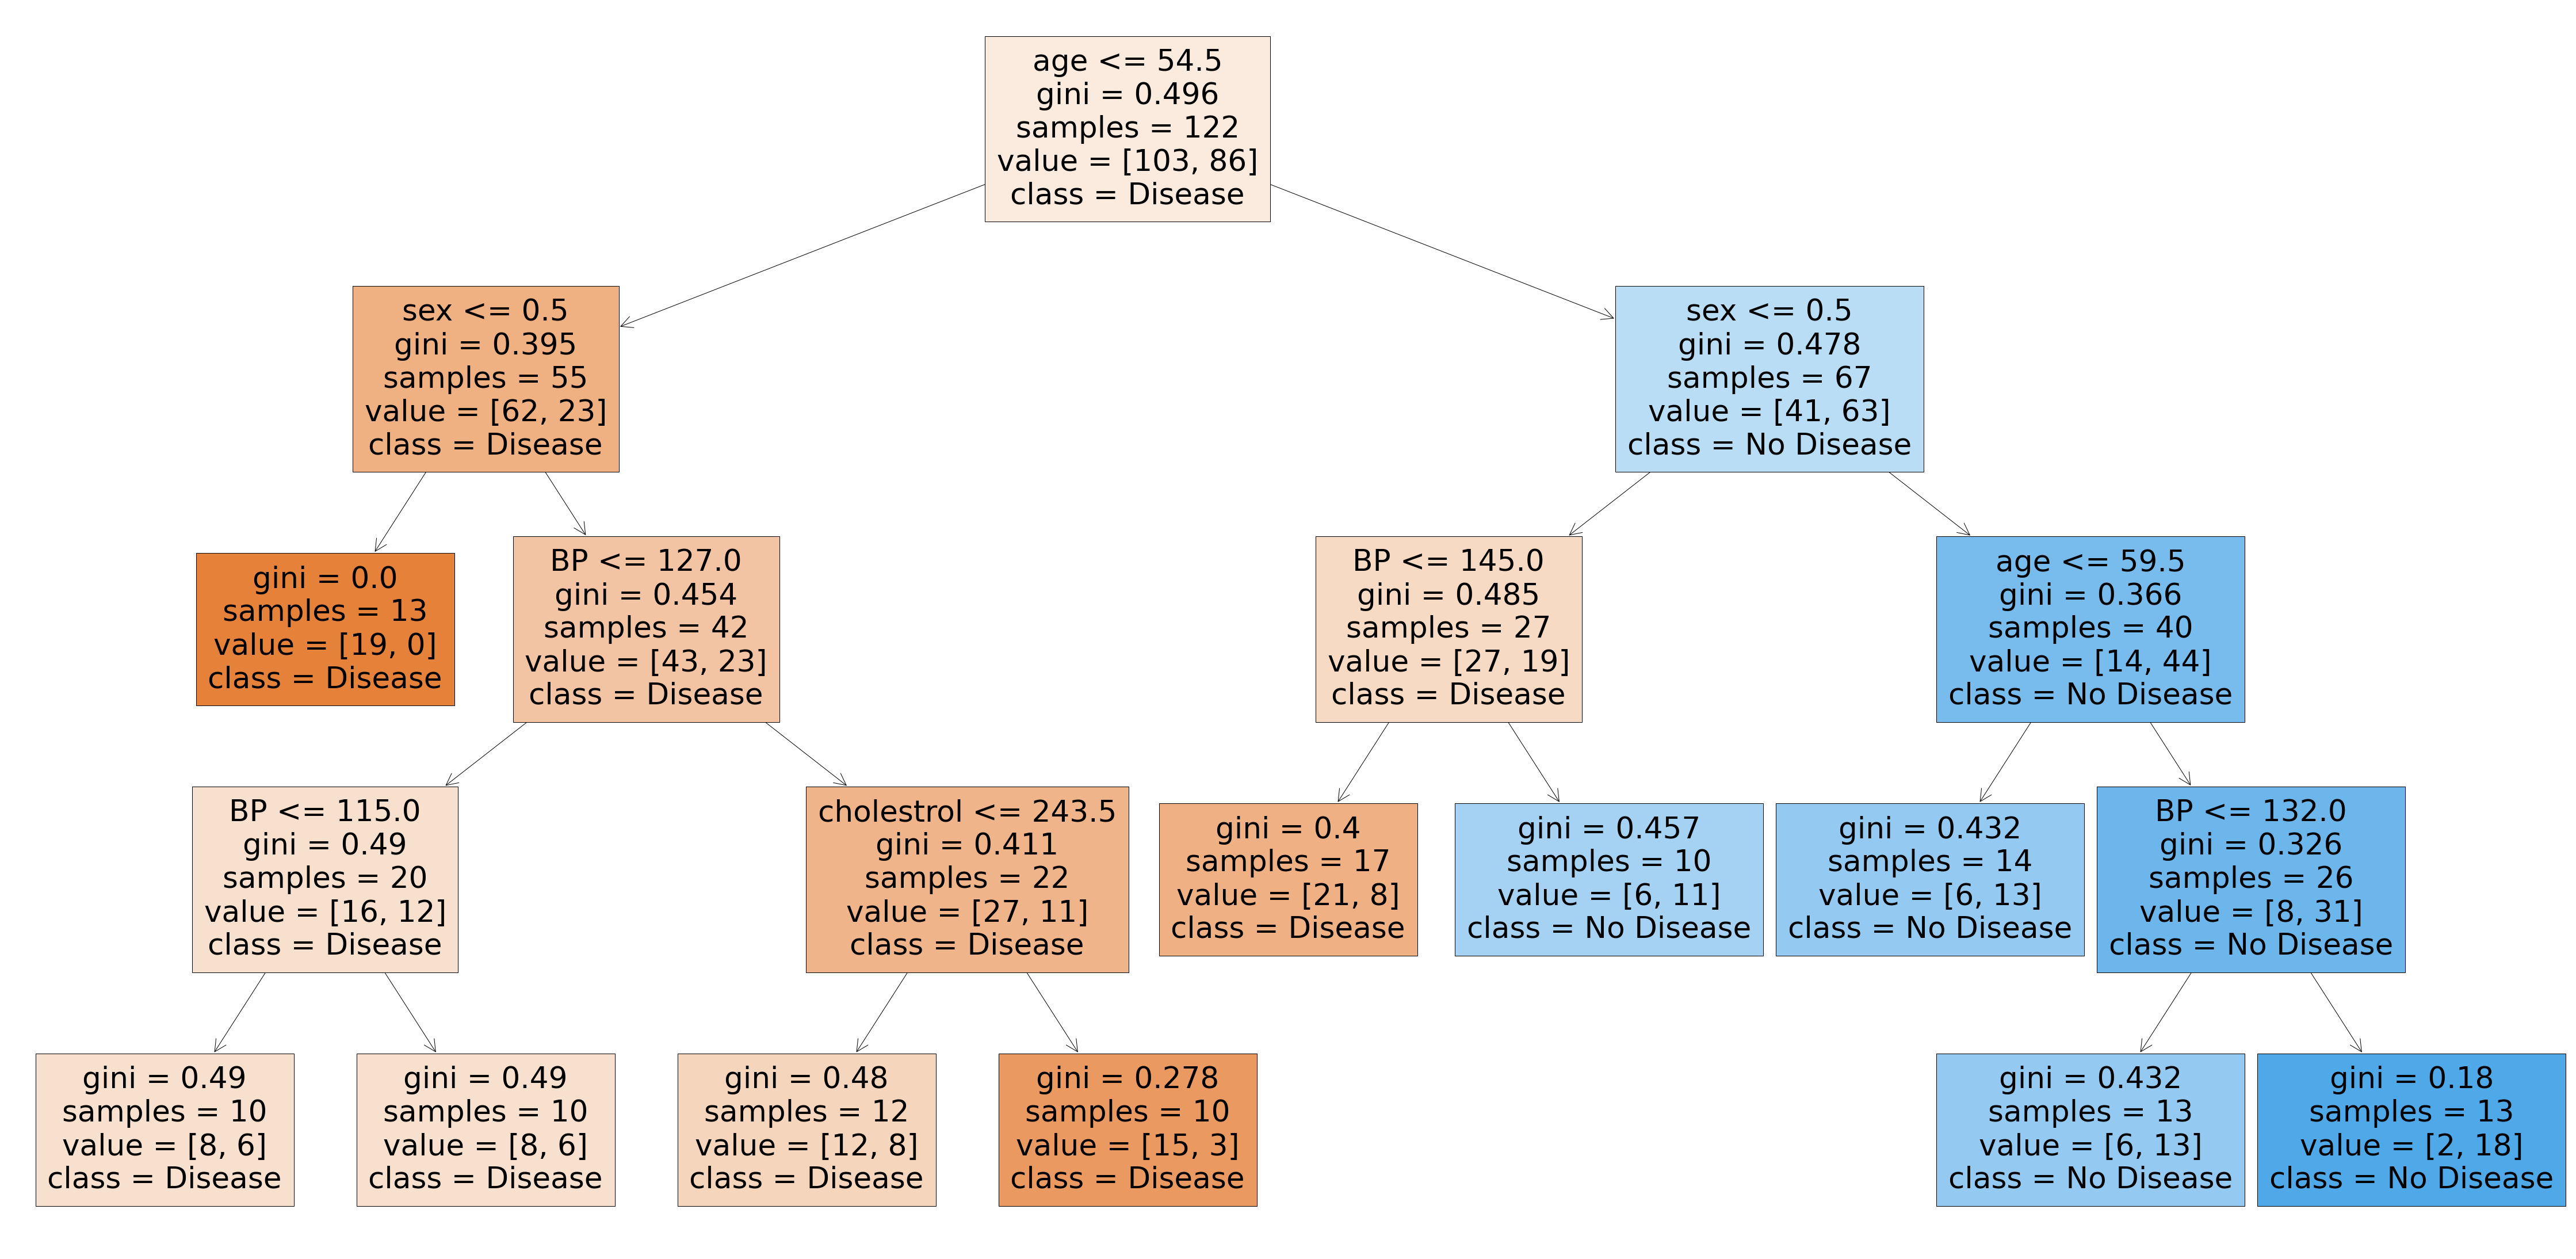

In [ ]:
# Visualizing the decision tree with index 7 in the given random foresr

from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[7], feature_names = X.columns,class_names=['Disease', "No Disease"],filled=True);

In [ ]:
# Finding the feature importance

rf_best.feature_importances_

array([0.46128487, 0.2180848 , 0.13174619, 0.18888413])

In [ ]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [ ]:
imp_df.sort_values(by="Imp", ascending=False)


,Varname,Imp
0,age,0.461285
1,sex,0.218085
3,cholestrol,0.188884
2,BP,0.131746


In [ ]:
# Model (Model Picked through GridSearch) Validation

from sklearn.metrics import confusion_matrix

y_pred = rf_best.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm

array([[33, 16],
       [14, 18]])

Text(69.0, 0.5, 'Truth')

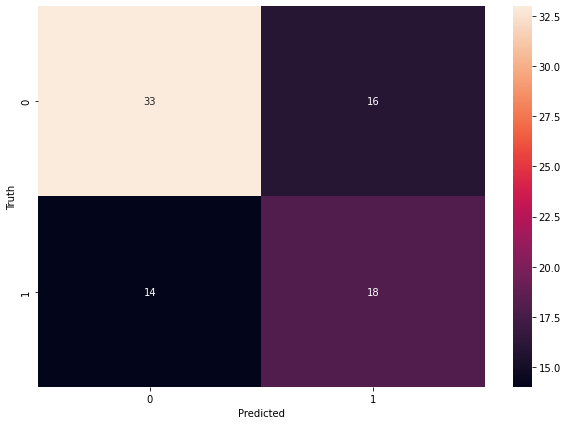

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
# Classification Report (Model Picked through GridSearch)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.67      0.69        49
           1       0.53      0.56      0.55        32

    accuracy                           0.63        81
   macro avg       0.62      0.62      0.62        81
weighted avg       0.63      0.63      0.63        81



In [ ]:
# Model (Original Model) Validation

y_pred1 = classifier_rf.predict(X_test)

cm1 = confusion_matrix(y_test, y_pred1)
cm1

array([[36, 13],
       [15, 17]])

Text(69.0, 0.5, 'Truth')

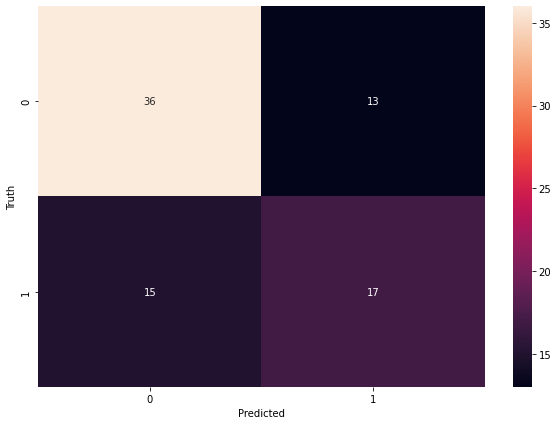

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(cm1, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
# Classification Report (Original Model)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72        49
           1       0.57      0.53      0.55        32

    accuracy                           0.65        81
   macro avg       0.64      0.63      0.63        81
weighted avg       0.65      0.65      0.65        81

